In [1]:
import math
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from matplotlib.patches import Rectangle

In [2]:
imgd0 = cv2.imread("./COMP9517 20T2 Group Project Image Sequences/DIC-C2DH-HeLa/Sequence 1/t000.tif")
imgd1 = cv2.imread("./COMP9517 20T2 Group Project Image Sequences/DIC-C2DH-HeLa/Sequence 1/t001.tif")
imgf0 = cv2.imread("./COMP9517 20T2 Group Project Image Sequences/Fluo-N2DL-HeLa/Sequence 1/t000.tif")
imgf1 = cv2.imread("./COMP9517 20T2 Group Project Image Sequences/Fluo-N2DL-HeLa/Sequence 1/t001.tif")
imgp0 = cv2.imread("./COMP9517 20T2 Group Project Image Sequences/PhC-C2DL-PSC/Sequence 1/t000.tif")


In [3]:
print(np.mean(imgd0), np.mean(imgf0), np.mean(imgp0))

130.01990509033203 129.02893506493507 135.40692756558641


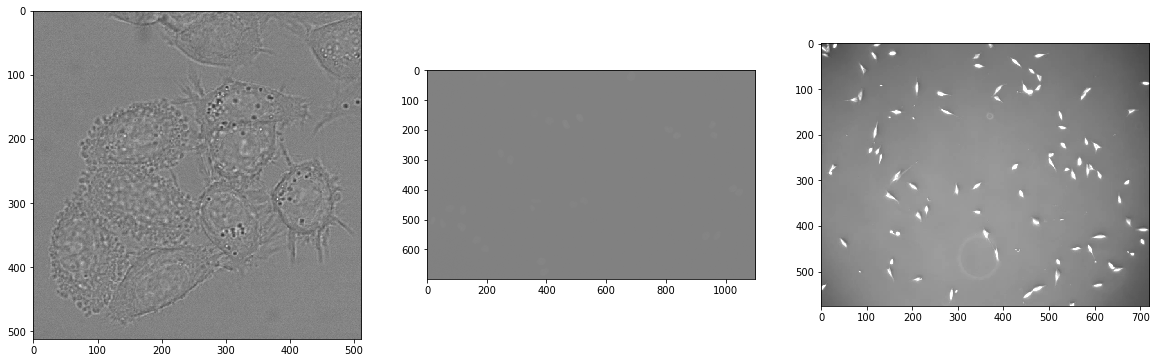

In [4]:
fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(imgd0, cmap="gray")
fig.add_subplot(1, 3, 2)
plt.imshow(imgf0, cmap="gray")
fig.add_subplot(1, 3, 3)
plt.imshow(imgp0, cmap="gray")
images=[imgd0, imgf0, imgp0]

In [9]:
def preprocessing(i, image):
    image = image[:,:,0]
    image = cv2.fastNlMeansDenoising(image,50,50,7,21)
    sigma=15/(2*math.sqrt(2*np.log(2)))
    image=cv2.GaussianBlur(image,(3, 3),sigma, sigma)
    image = ndi.maximum_filter(image, size=10, mode='constant')
    local_max = peak_local_max(image, indices=False, min_distance=15)
    fig.add_subplot(3, 4, i*4+1)
    plt.imshow(images[i], cmap="gray")
    local_max=local_max.astype(np.uint8)
    fig.add_subplot(3, 4, i*4+2)
    plt.title("local maxima")
    plt.imshow(local_max, cmap="gray")
    
    fig.add_subplot(3, 4, i*4+3)
    ret,otsu = cv2.threshold(image,0,255, cv2.THRESH_OTSU)
    plt.title("Otsu on max filtered image")
    plt.imshow(otsu, cmap="gray")
    
    fig.add_subplot(3, 4, i*4+4)
    m = ndi.maximum_filter(otsu, size=5, mode='constant')
#     m = ndi.minimum_filter(m, size=10, mode='constant')
    plt.imshow(m, cmap="gray")
    image = cv2.bitwise_and(otsu,otsu,mask = local_max)
#     fig.add_subplot(3, 4, i*4+4)
    plt.title("Otsu and local maxima")
    plt.imshow(image, cmap="gray")
    return m

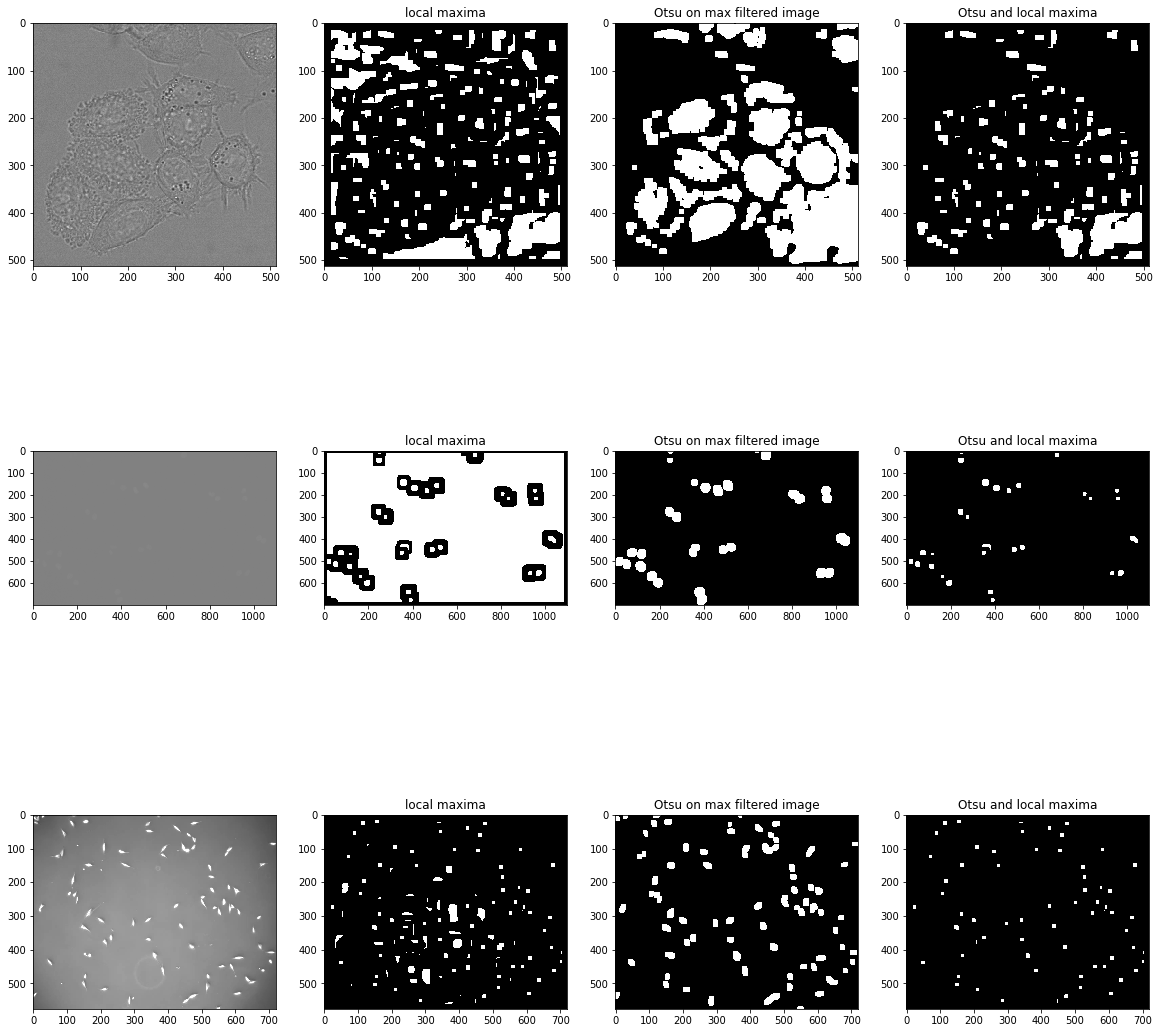

In [10]:
fig=plt.figure(figsize=(20, 20))
local_maxd0=preprocessing(0, imgd0)
local_maxf0=preprocessing(1, imgf0)
local_maxp0=preprocessing(2, imgp0)

In [12]:
def draw_contour(image, original):
    cnts = cv2.findContours(image.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_TC89_L1)

    ROIS = []
    for c in cnts[1]:
        (x, y, w, h) = cv2.boundingRect(c)
        ROIS.append([x, y, x+w, y+h])

    ROIS = np.array(ROIS)
    
    for i in range(len(ROIS[:, 0])):
        x1=ROIS[i, 0]
        x2=ROIS[i, 2]
        y1=ROIS[i, 1]
        y2=ROIS[i, 3]
        plt.imshow(original)
        rect = Rectangle((x1, y1), (x2-x1), (y2-y1), fill=False, color='red')
        plt.axes().add_patch(rect) 
    plt.show()

/Users/shizukahayashi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


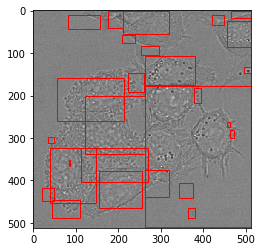

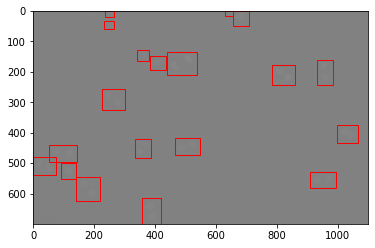

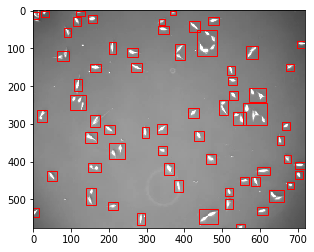

In [13]:
fig=plt.figure()
fig.add_subplot(1, 3, 1)
draw_contour(local_maxd0, imgd0)
fig.add_subplot(1, 3, 2)
draw_contour(local_maxf0, imgf0)
fig.add_subplot(1, 3, 3)
draw_contour(local_maxp0, imgp0)

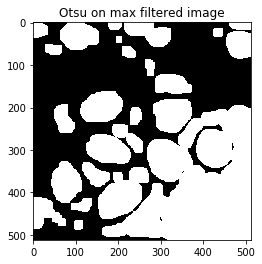

In [10]:
denoise_img = cv2.fastNlMeansDenoising(imgd0,50,50,7,21)
img=preprocessing(0, denoise_img)